In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.formula.api import ols
import statsmodels.api as sm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/penguins/penguins.csv


In [7]:
data = pd.read_csv('/kaggle/input/penguins/penguins.csv')

In [8]:
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [21]:
##dropping na values
data.isna().sum()
penguins = data.dropna().reset_index()
penguins_new = penguins[['species','island','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

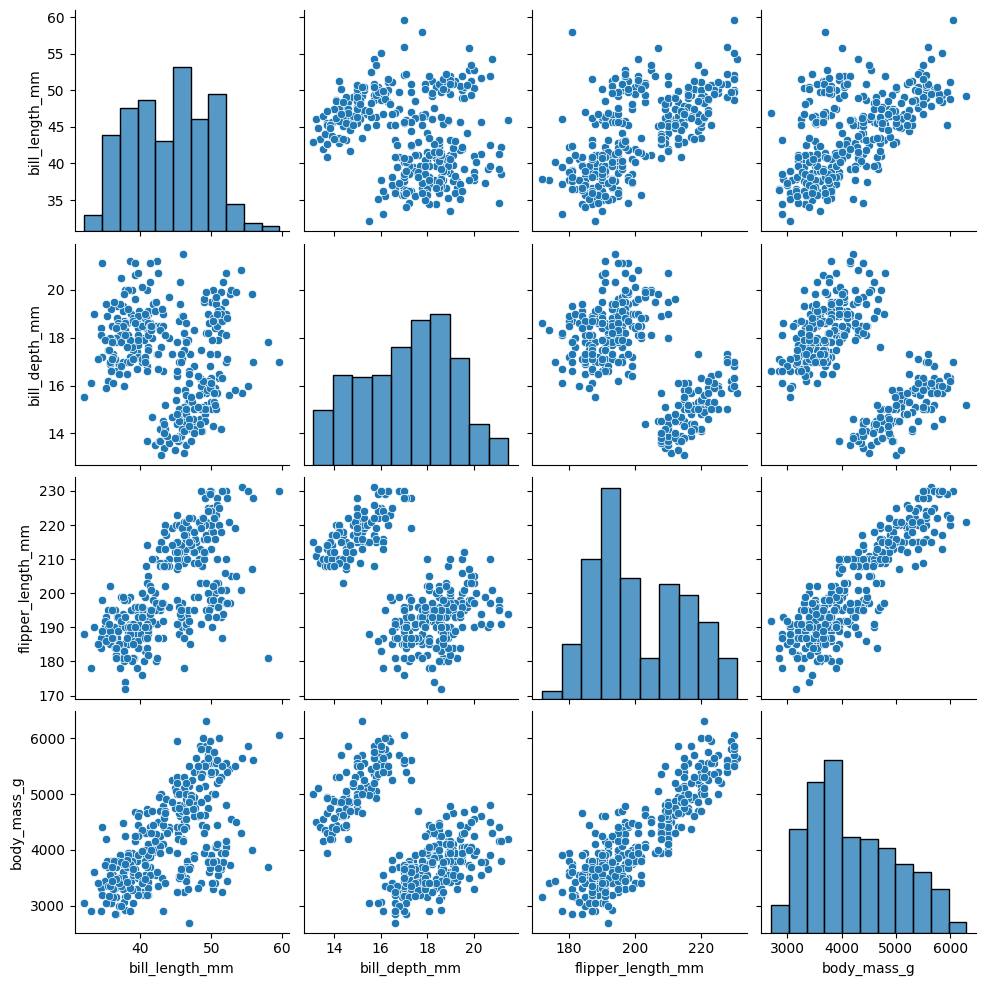

In [10]:
sns.pairplot(penguins_new)
##pairplot to understand relationship between continuous variables available
##theres strong positive linear correlation body_mass_g and flipper_length_mm. There seems to be a correlation between bill_depth_mm and body_mass_g

4 assumptions of multivariate regression 
* Linearity of variables
* Independent observations
* Homoscedascity 
* No multicollinearity across independent variables, explored using sns.pairplot()

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

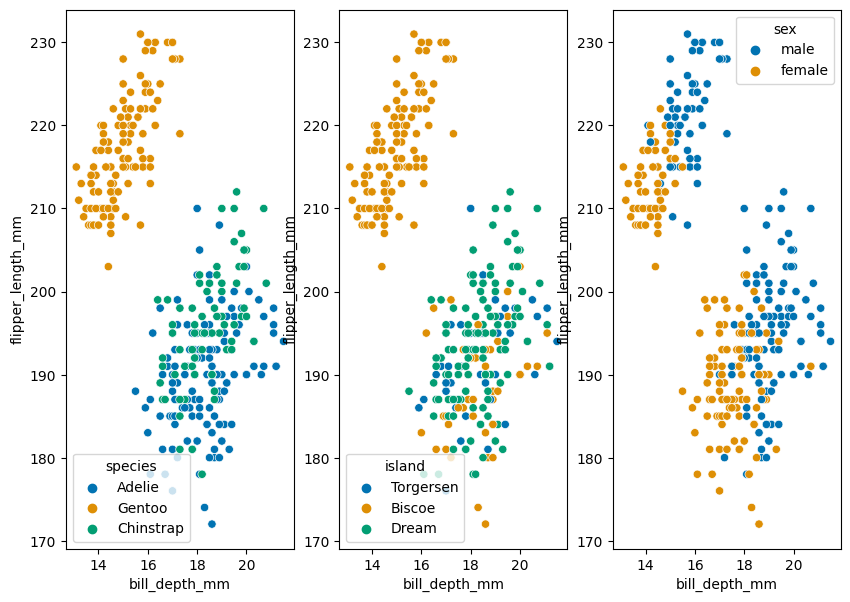

In [14]:
##exploring relationship between flipper_length_mm and body_mass_g to understand the 2 clusters

penguins2 = penguins_new[['species', 'island', 'sex', 'flipper_length_mm', 'bill_depth_mm']]
fig,ax = plt.subplots(1,3, figsize=(10,7))
sns.scatterplot(data=penguins2, x='bill_depth_mm', y='flipper_length_mm', hue='species', palette='colorblind', ax=ax[0])
sns.scatterplot(data=penguins2, x='bill_depth_mm', y='flipper_length_mm', hue='island', palette='colorblind', ax=ax[1])
sns.scatterplot(data=penguins2, x='bill_depth_mm', y='flipper_length_mm', hue='sex', palette='colorblind', ax=ax[2])
##the clusters seem to most concentrateed across species indicating a useful variable for regression testing. theres no clear clusters across island

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'qq plot of residuals')

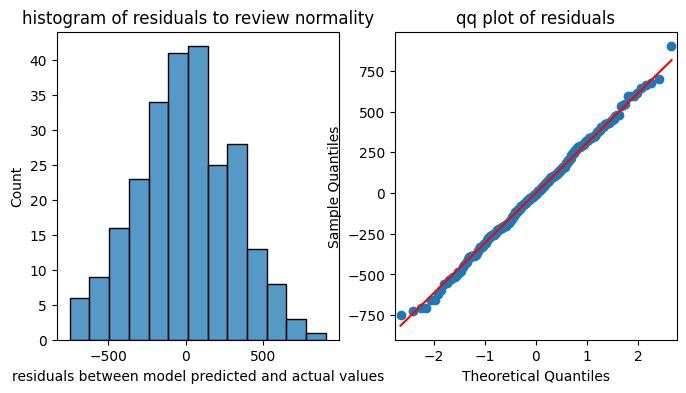

In [25]:
#reviewing normality assumption of model

residuals = model.resid
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(residuals, ax=ax[0])
ax[0].set_xlabel('residuals between model predicted and actual values')
ax[0].set_title('histogram of residuals to review normality')
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('qq plot of residuals')
##there is a normal distribution of residuals and the qqplot shows strong linearity 

In [17]:
##holdout sample for multivariate regression
x = penguins_new[['species','island','sex','bill_length_mm', 'bill_depth_mm']]
y = penguins_new[['body_mass_g']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=1)

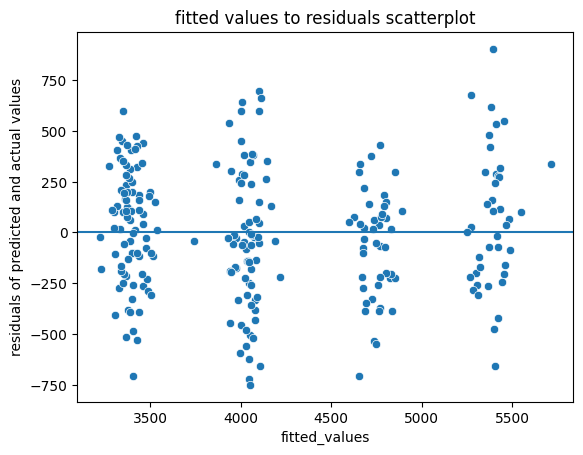

In [42]:
##reviewing constant variance / homoscedastic assumption of model

fitted_values = model.fittedvalues
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.set_xlabel('fitted_values')
fig.set_ylabel('residuals of predicted and actual values')
fig.set_title('fitted values to residuals scatterplot')
fig.axhline(0)
plt.show()
##there is constant variances

In [20]:
##calculating variance inflation factor as metric for multicollinearity as a second measure to the pairplot
x_new = x[['bill_length_mm', 'bill_depth_mm']]
vif = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
data_vif = pd.DataFrame(vif, index=x_new.columns, columns=['VIF'])
data_vif
#the vif value is higher than expecting, so we'll be dropping the bill_depth_mm from the independent variables

,VIF
bill_length_mm,29.20756
bill_depth_mm,29.20756


In [18]:
ols_formula = 'body_mass_g ~ bill_length_mm + C(sex) + C(species)'
ols_data = pd.concat([x_train, y_train], axis=1)
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     343.5
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           6.01e-99
Time:                        05:47:15   Log-Likelihood:                -1779.6
No. Observations:                 249   AIC:                             3569.
Df Residuals:                     244   BIC:                             3587.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2252.2393    321.850      6.998      0.000    1618.280    2886.199
C(sex)[T.male]            541.5941     49.062     11.039      0.000     444.955     638.233
C(species)[T.Chinstrap]  -277.8042    103.324     -2.689      0.008    -481.326     -74.282
C(species)[T.Gentoo]     1100.9943     86.484     12.731      0.000     930.644    1271.344
bill_length_mm             30.5033      8.624      3.537      0.000      13.516      47.491
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.546
Skew:                           0.006   Prob(JB):                        0.761
Kurtosis:                       2.771   Cond. No.                         769.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results
* The 4 assumptions of the model were met: normality, homoscedascity, collinearity, independent
* The p_values are all <5% indicating that our x variables are statistically significant
* The proportion of values accurately predicted by the model is ~85% illustrated in the adjusted r^2 value. The additional variables did not conflate the coeff signficantly
* The results encoded penguins as male=1 and female=0. We expect a male penguin to weigh 541g more than a female penguin
* We also expect chinstraps to weigh 277g less than Adelie penguins and Gentoo penguins to weight 1100g more than Adelie penguins
* We would expect that the average penguin would weigh 30g more for every penguins 1mm bill length
